In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tqdm import tqdm

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# mnist.train.shape

In [4]:
# (1) INITIALIZATION
K = 200
L = 100
M = 60
N = 30
# Placeholder for input
X = tf.placeholder(tf.float32, [None, 784])
# Placeholder for correct answers
Y_ = tf.placeholder(tf.float32, [None, 10])  # one-hot encoded
# Weights(W) and biases(b)
W1 = tf.Variable( tf.truncated_normal([784, K], stddev=0.1) )
B1 = tf.Variable( tf.zeros([K]) )
W2 = tf.Variable( tf.truncated_normal([K, L], stddev=0.1) )
B2 = tf.Variable( tf.zeros([L]) )
W3 = tf.Variable( tf.truncated_normal([L, M], stddev=0.1) )
B3 = tf.Variable( tf.zeros([M]) )
W4 = tf.Variable( tf.truncated_normal([M, N], stddev=0.1) )
B4 = tf.Variable( tf.zeros([N]) )
W5 = tf.Variable( tf.truncated_normal([N, 10], stddev=0.1) )
B5 = tf.Variable( tf.zeros([10]) )

init = tf.global_variables_initializer()

In [5]:
# (2) SUCCESS METRICS

# Model
X = tf.reshape(X, [-1, 784])  # "-1" means there is only one solution, figure it out.
Y1 = tf.nn.relu( tf.matmul(X, W1) + B1 )
Y2 = tf.nn.relu( tf.matmul(Y1, W2) + B2 )
Y3 = tf.nn.relu( tf.matmul(Y2, W3) + B3 )
Y4 = tf.nn.relu( tf.matmul(Y3, W4) + B4 )
Y = tf.nn.softmax( tf.matmul(Y4, W5) + B5 )
# Loss function
cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
# cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2(logits=Y, labels=Y_) )
# %age of correct answers found in batch
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [6]:
# (3) TRAINING

optimizer = tf.train.GradientDescentOptimizer(0.003)
train_step = optimizer.minimize(cross_entropy)

In [11]:
# (4) RUN
sess = tf.Session()
sess.run(init)

epoch = 3000
cost_history = []
accu_test_history = []
for i in tqdm(range(epoch)):
    # load batch of images & correct answers
    batch_X, batch_Y = mnist.train.next_batch(100)
    # train
    sess.run(train_step, feed_dict={X:batch_X, Y_:batch_Y})
    
    # success ??
    a,c = sess.run([accuracy, cross_entropy], feed_dict={X:batch_X, Y_:batch_Y})
    # success on test data ??
    a_test,c_test = sess.run([accuracy, cross_entropy], feed_dict={X:mnist.test.images, Y_:mnist.test.labels})
    accu_test_history.append(a_test)
    cost_history.append(c_test)
#     if i % 100 == 0:
#         print("EPOCH ", i)
#         print("Accuracy = {0}% , Cost = {1}".format(round(a_test*100,2), c_test))

print("Accuracy = {0}% , Cost = {1}".format(round(a_test*100,2), c_test))

sess.close()

100%|██████████| 3000/3000 [13:42<00:00,  3.65it/s]

Accuracy = 97.36% , Cost = 950.5697021484375


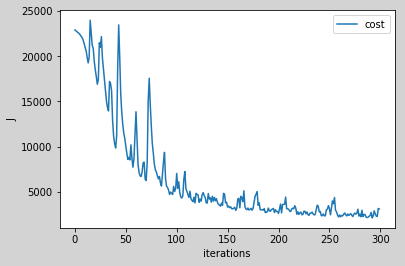

In [8]:
plt.figure().patch.set_facecolor('lightgrey')
plt.plot(range(epoch), cost_history, label='cost')
# plt.plot(range(200,epoch,100),cost_history[200::100], label='Cost')
plt.xlabel("iterations")
plt.ylabel("J")
plt.legend()
plt.show()

In [13]:
print(max(accu_test_history))

0.977
